In [1]:
#importing necessarry libraries
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
import keras

In [2]:
#Loading dataset

(X_train,Y_train),(X_test,Y_test)=datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
X_train[0].shape

(32, 32, 3)

In [6]:
Y_train.shape

(50000, 1)

In [7]:
Y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [8]:
Y_train=Y_train.reshape(-1,)

In [9]:
Y_train.shape

(50000,)

In [10]:
Y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [11]:
Y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [12]:
Y_test=Y_test.reshape(-1,)

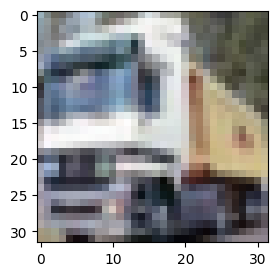

In [13]:
plt.figure(figsize=(15,3))
plt.imshow(X_train[1])

In [14]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [15]:
classes[2]

'bird'

In [16]:
def plot_sample(X,y,index):
    plt.figure(figsize=(10,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

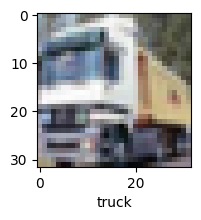

In [17]:
plot_sample(X_train,Y_train,1)

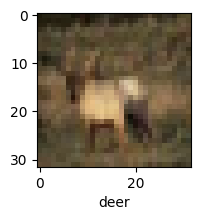

In [18]:
plot_sample(X_train,Y_train,3)

In [19]:
#normalize
X_train=X_train/255
X_test=X_test/255

In [20]:
#building the model using CNN

cnn=models.Sequential([
    #cnn
    layers.Conv2D(128,kernel_size=3,activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D(pool_size=2,strides=2),

    layers.Conv2D(64,kernel_size=3,activation='relu'),
    layers.MaxPooling2D(pool_size=2,strides=2),

    #FC layer
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(64,activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(10,activation='softmax')
])



In [21]:
#compiling the model
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [22]:
cnn.fit(X_train,Y_train,epochs=3)

Epoch 1/3
1563/1563 [==============================] - 18s 5ms/step - loss: 1.5517 - accuracy: 0.4377
Epoch 2/3
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2016 - accuracy: 0.5766
Epoch 3/3
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0584 - accuracy: 0.6304


In [23]:
loss,accuracy=cnn.evaluate(X_train,Y_train) #train accuracy

1563/1563 [==============================] - 5s 3ms/step - loss: 0.9164 - accuracy: 0.6871


In [24]:
print(f"loss:     {loss}\ train naccuracy: {100*accuracy}")

loss:     0.9163662791252136\ train naccuracy: 68.70800256729126


In [25]:
cnn.evaluate(X_test,Y_test) #test accuracy

313/313 [==============================] - 1s 3ms/step - loss: 1.0179 - accuracy: 0.6461


[1.0178555250167847, 0.6460999846458435]

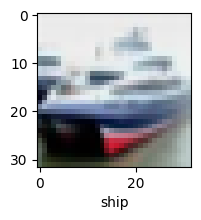

In [26]:
#True class
plot_sample(X_test,Y_test,1)

In [27]:
Y_pred=cnn.predict(X_test)


313/313 [==============================] - 1s 2ms/step


In [28]:
#predicted class
classes[np.argmax(Y_pred[1])]

'ship'

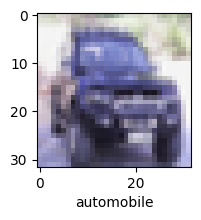

In [29]:
#True class
plot_sample(X_test,Y_test,9)

In [30]:
#predicted class
classes[np.argmax(Y_pred[9])]

'automobile'

In [31]:
Y_classes=[np.argmax(i) for i in Y_pred ]


In [32]:
Y_classes[:5]

[3, 8, 8, 8, 4]

In [33]:
Y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [34]:
from sklearn.metrics import classification_report

In [35]:
print("classification report for CNN: \n\n",classification_report(Y_test,Y_classes))

classification report for CNN: 

               precision    recall  f1-score   support

           0       0.60      0.78      0.68      1000
           1       0.77      0.80      0.78      1000
           2       0.58      0.47      0.52      1000
           3       0.41      0.57      0.48      1000
           4       0.65      0.51      0.57      1000
           5       0.62      0.45      0.52      1000
           6       0.78      0.70      0.74      1000
           7       0.68      0.72      0.70      1000
           8       0.72      0.78      0.75      1000
           9       0.73      0.69      0.71      1000

    accuracy                           0.65     10000
   macro avg       0.65      0.65      0.64     10000
weighted avg       0.65      0.65      0.64     10000



# Now we apply DenseNet

In [36]:
from keras.layers import BatchNormalization,Conv2D,ReLU,Input,MaxPool2D,AvgPool2D,Dense,Flatten,GlobalAvgPool2D,concatenate
from keras import Model

In [46]:
def densenet(input_shape,n_classes,f=64):

    def bn_rl_conv(x,f,k=1,s=1): #x is input data,f is filters,k is kernel size,s is strides
        x=BatchNormalization()(x)
        x=ReLU()(x)
        x=Conv2D(f,k,strides=s,padding='same')(x)
        return x

    def dense_block(x,r):  # r is layers in a denseblock
        for _ in range(r):
            y=bn_rl_conv(x,4*f)
            y=bn_rl_conv(y,4*f,k=3)
            x=concatenate([y,x])
            return x

    def transition_layer(x,f):
        x=bn_rl_conv(x,f)
        x=AvgPool2D(2,strides=2,padding='same')(x)
        return x

    input=Input(input_shape)
    x=Conv2D(64,7,strides=2,padding='same')(input)
    x=MaxPool2D(3,strides=2,padding='same')(x)

    for r in [6,12,24,16]:      # defines the no of conv layers in eazch dense block
        d=dense_block(x,r)
        x=transition_layer(d,f)

    x=GlobalAvgPool2D()(d)
    x=Dense(20,activation='relu')(x)
    output=Dense(n_classes,activation='softmax')(x)

    model=Model(input,output)
    return model


In [47]:
INPUT_SHAPE=(32,32,3)
N_CLASSES=10
model=densenet(INPUT_SHAPE,N_CLASSES)

In [ ]:
model.summary()

In [52]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [53]:
model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 27s 12ms/step - loss: 0.6592 - accuracy: 0.7717
Epoch 2/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.5890 - accuracy: 0.7965
Epoch 3/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.5259 - accuracy: 0.8176
Epoch 4/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.4633 - accuracy: 0.8385
Epoch 5/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.4160 - accuracy: 0.8537
Epoch 6/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.3628 - accuracy: 0.8727
Epoch 7/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.3200 - accuracy: 0.8880
Epoch 8/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.2822 - accuracy: 0.9010
Epoch 9/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.2571 - accuracy: 0.9105
Epoch 10/10
1563/1563 [==============================] - 18s 11m

In [54]:
loss,accuracy=model.evaluate(X_train,Y_train) #train accuracy

1563/1563 [==============================] - 7s 5ms/step - loss: 0.3121 - accuracy: 0.8935


In [55]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 5ms/step - loss: 1.0142 - accuracy: 0.7410


[1.0141727924346924, 0.7409999966621399]

In [56]:
y_pred=model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [57]:
classes[np.argmax(y_pred[4])]

'frog'

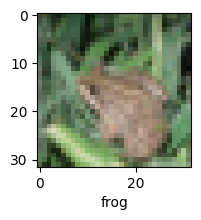

In [58]:
plot_sample(X_test,Y_test,4)

In [59]:
y_classes=[np.argmax(i)for i in y_pred]
y_classes[:5]

[3, 8, 7, 8, 6]

In [60]:
Y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [61]:
print("classification report for CNN-DenseNet: \n\n",classification_report(Y_test,y_classes))

classification report for CNN-DenseNet: 

               precision    recall  f1-score   support

           0       0.83      0.74      0.78      1000
           1       0.86      0.86      0.86      1000
           2       0.64      0.70      0.67      1000
           3       0.62      0.47      0.53      1000
           4       0.72      0.68      0.70      1000
           5       0.59      0.71      0.65      1000
           6       0.62      0.90      0.74      1000
           7       0.82      0.78      0.80      1000
           8       0.91      0.81      0.86      1000
           9       0.90      0.75      0.82      1000

    accuracy                           0.74     10000
   macro avg       0.75      0.74      0.74     10000
weighted avg       0.75      0.74      0.74     10000



In [62]:

cm_cnn = tf.math.confusion_matrix(labels=Y_test,predictions=Y_classes)
cm_cnn

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[776,  19,  38,  21,  14,   1,   3,  12,  82,  34],
       [ 49, 801,   6,   9,   3,   2,   7,   5,  42,  76],
       [112,   8, 470, 123,  85,  68,  51,  39,  25,  19],
       [ 36,  14,  53, 569,  52, 115,  46,  47,  40,  28],
       [ 55,   7,  87, 125, 510,  16,  61, 117,  15,   7],
       [ 30,   6,  65, 300,  25, 446,  16,  79,  18,  15],
       [ 18,  10,  46, 133,  31,  13, 701,  13,  18,  17],
       [ 32,   8,  30,  70,  52,  53,   2, 716,   4,  33],
       [124,  42,   8,   7,   4,   4,   1,   6, 784,  20],
       [ 56, 131,   9,  22,   6,   3,   8,  17,  60, 688]], dtype=int32)>

Text(0.5, 1.0, 'CNN analysis')

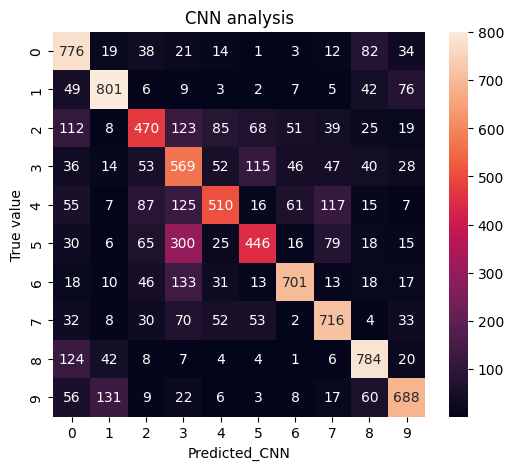

In [63]:
import seaborn as sn
plt.figure(figsize = (6,5))
sn. heatmap (cm_cnn, annot=True, fmt='d')
plt.xlabel('Predicted_CNN')
plt.ylabel("True value")
plt.title("CNN analysis")

In [64]:
cm_dn = tf.math.confusion_matrix(labels=Y_test,predictions=y_classes)
cm_dn

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[745,  18,  87,  20,  20,  19,  26,  11,  38,  16],
       [ 19, 863,  10,   4,   5,   4,  28,   4,  17,  46],
       [ 27,   1, 697,  25,  63,  58, 113,  15,   0,   1],
       [  9,   4,  71, 465,  63, 233, 121,  27,   4,   3],
       [  8,   2,  55,  43, 680,  33, 137,  41,   1,   0],
       [  7,   3,  57,  96,  28, 712,  56,  39,   1,   1],
       [  1,   5,  24,  25,   9,  27, 900,   7,   1,   1],
       [  5,   1,  35,  28,  54,  76,  15, 784,   0,   2],
       [ 53,  24,  26,  24,   7,  26,  14,   3, 811,  12],
       [ 25,  81,  19,  19,  10,  17,  34,  24,  18, 753]], dtype=int32)>

Text(0.5, 1.0, 'DenseNet analysis')

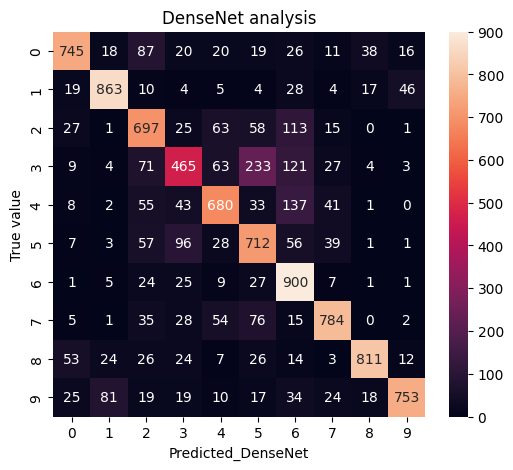

In [65]:
plt.figure(figsize = (6,5))
sn. heatmap (cm_dn, annot=True, fmt='d')
plt.xlabel('Predicted_DenseNet')
plt.ylabel("True value")
plt.title("DenseNet analysis")

# As we can see the DenseNet model performed better
